In [1]:
(require '[acausal.core :as a])

In [3]:
(def kidney
    "Model from Charig et. al."
    (a/model
        {:size []
         :treatment [:size]
         :recovery [:treatment :size]}))

#'user/kidney

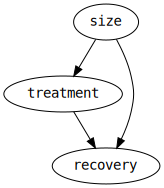

In [4]:
kidney

In [5]:
(a/query [:recovery] :do [:treatment])

#acausal.core.Query{:effect #{:recovery}, :do #{:treatment}}

In [6]:
(a/identify
    kidney
    (a/query [:recovery] :do [:treatment]))

{:sub #{:size},
 :sum
 {:prod
  #{{:p #{:size},
     :where
     {:sub #{:treatment :recovery},
      :sum {:p #{:treatment :size :recovery}}}}
    {:p #{:recovery}, :given #{:treatment :size}}}}}


In [11]:
(clojure.repl/doc a/ancestors)

-------------------------
acausal.core/ancestors
([m x])
  Returns An(x)_m
  i.e. the ancestors of the nodes x for model m, inclusive.
